In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from datetime import datetime
import bs4
import pandas as pd
import spacy
from gensim.models.phrases import Phrases, Phraser
from spacy.pipeline import Pipe

# Data Processing

In [2]:
df = pd.read_json('reviews.json')

In [3]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name
0,Pattern: LED Flashlight 2P,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy
1,Pattern: LED Flashlight 2P,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB
10,Pattern: LED Flashlight 2P,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky
100,Pattern: LED Flashlight 2P,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins
101,Pattern: 4 pack,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911


In [4]:
df = df.reset_index(drop=True) 

In [5]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name
0,Pattern: LED Flashlight 2P,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy
1,Pattern: LED Flashlight 2P,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB
2,Pattern: LED Flashlight 2P,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky
3,Pattern: LED Flashlight 2P,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins
4,Pattern: 4 pack,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911


- product_pattern: different pack of LED lighting
- review_date: the date author published the review
- review_id: id for each review
- review_rating: rating(1 to 5 scores)
- review_text: body of reviews
- review_title: tiltle of reviews
- user_id: id for each author
- user_name: name for each author

In [6]:
df.count()

product_pattern    742
review_date        742
review_id          742
review_rating      742
review_text        742
review_title       742
user_id            742
user_name          742
dtype: int64

- Total observations: 742

In [7]:
df.isnull().values.any()

False

- all of them are valid

In [8]:
df.nunique()

product_pattern      3
review_date        313
review_id          742
review_rating        5
review_text        732
review_title       480
user_id            742
user_name          645
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
product_pattern    742 non-null object
review_date        742 non-null object
review_id          742 non-null object
review_rating      742 non-null int64
review_text        742 non-null object
review_title       742 non-null object
user_id            742 non-null object
user_name          742 non-null object
dtypes: int64(1), object(7)
memory usage: 46.5+ KB


- product_pattern

In [10]:
df.product_pattern.unique()

array(['Pattern: LED Flashlight 2P', 'Pattern: 4 pack', 'Pattern: 6 pack'], dtype=object)

In [11]:
df = df.replace({'Pattern: LED Flashlight 2P':'2 pack',
         'Pattern: 4 pack':'4 pack', 
         'Pattern: 6 pack':'6 pack'})

In [12]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name
0,2 pack,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy
1,2 pack,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB
2,2 pack,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky
3,2 pack,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins
4,4 pack,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911


- review_date check

In [13]:
df[df.review_date < '2017-01-01']

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name


- review_id

In [14]:
len(df.review_id.unique())

742

- review_rating

In [15]:
df.review_rating.unique()

array([5, 4, 1, 3, 2])

In [16]:
rating = pd.DataFrame(df.review_rating.value_counts().head(5))
rating.reset_index(level=0, inplace = True)
rating.columns=['rating', 'count']
rating

,rating,count
0,5,473
1,4,104
2,1,70
3,3,49
4,2,46


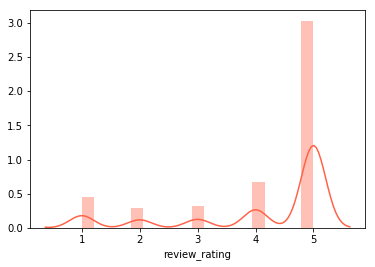

In [17]:
sns.distplot(df.review_rating, color = 'tomato')
plt.show()

- review_text

In [18]:
len(df.review_text.unique())

732

In [19]:
review_text = pd.DataFrame(df.review_text.value_counts().head(10))
review_text = pd.DataFrame(review_text.head(7))
review_text.reset_index(level=0, inplace = True)
review_text.columns = ['text', 'count']

In [20]:
review_text

,text,count
0,Great product,4
1,Very bright and compact,3
2,Very good.,2
3,good,2
4,Perfect,2
5,perfect,2
6,very good,2


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


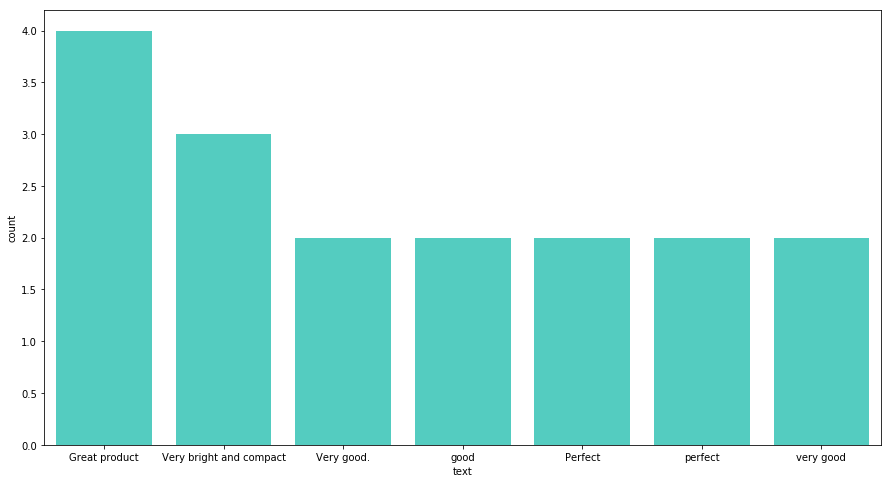

In [21]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="text", y="count", data=review_text,
            label="Reviews Duplicate", color="turquoise",ax = ax)
plt.show()

- review title

In [22]:
review_title = pd.DataFrame(df.review_title.value_counts().head(10))
review_title.reset_index(level=0, inplace = True)
review_title.columns = ['title', 'count']
review_title

,title,count
0,Five Stars,184
1,Four Stars,35
2,One Star,18
3,Three Stars,14
4,Two Stars,6
5,great,2
6,Solid,2
7,Great little flashlight,2
8,Great deal,2
9,Rockbirds LED Flashlight,2


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


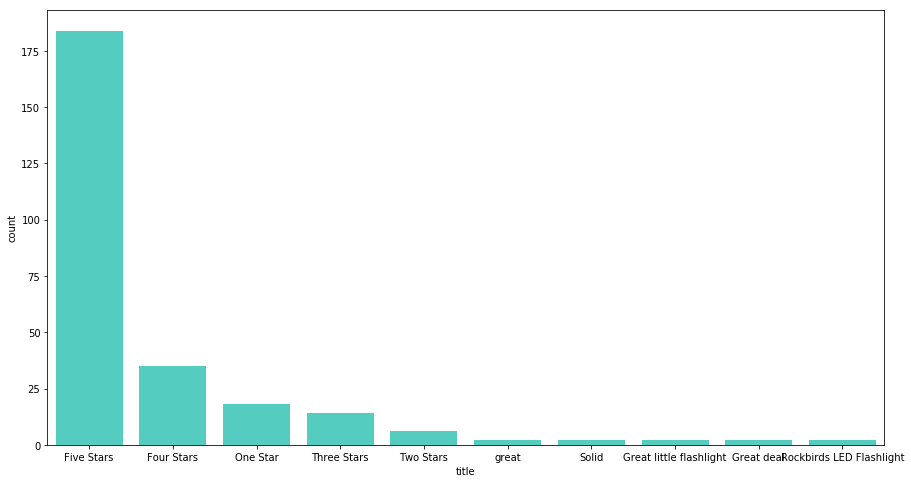

In [23]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="title", y="count", data=review_title,
            label="Title Duplicates", color="turquoise",ax = ax)
plt.show()

- User id

In [24]:
len(df.user_id.unique())

742

- User name

In [25]:
len(df.user_name.unique())

645

In [26]:
user_name = pd.DataFrame(df.user_name.value_counts().head(10))
user_name.reset_index(level=0, inplace = True)
user_name.columns = ['name', 'count']
user_name

,name,count
0,Amazon Customer,80
1,Eric,4
2,Chris,4
3,Cliente de Amazon,3
4,Mike,3
5,Happy,2
6,Aaron,2
7,John,2
8,B,2
9,george,2


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


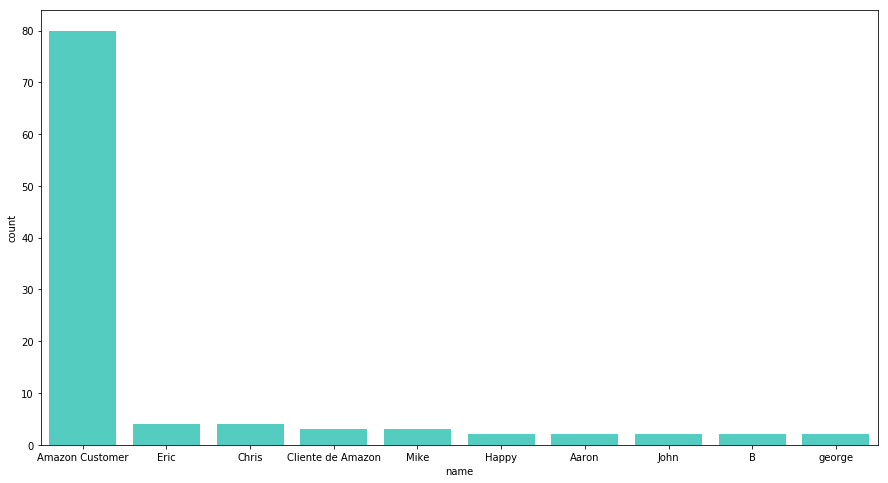

In [27]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="name", y="count", data=user_name,
            label="Title Duplicates", color="turquoise",ax = ax)
plt.show()

- product_pattern/rating

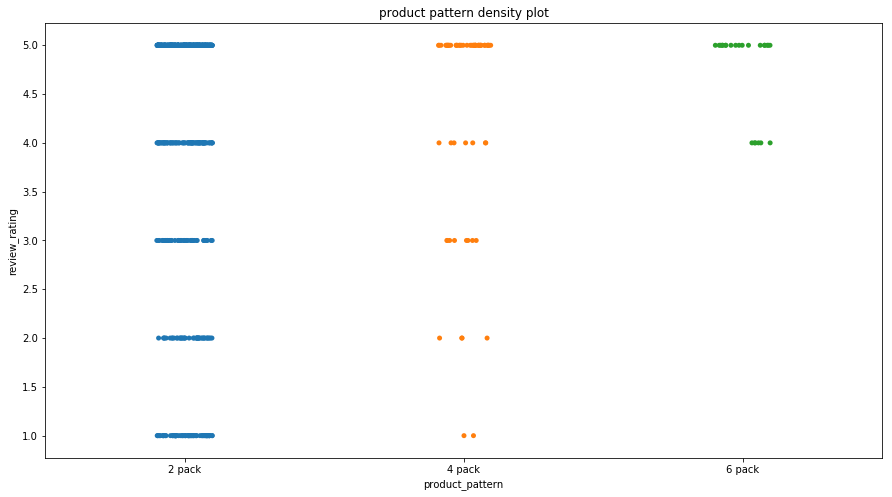

In [28]:
plt.figure(figsize = (15, 8))
plt.title('product pattern density plot')
sns.stripplot(x=df.product_pattern, y=df.review_rating, data=df, jitter=True)
plt.show()

- time/rating

In [29]:
time_rating = pd.DataFrame({'time':df.review_date, 'rating':df.review_rating})

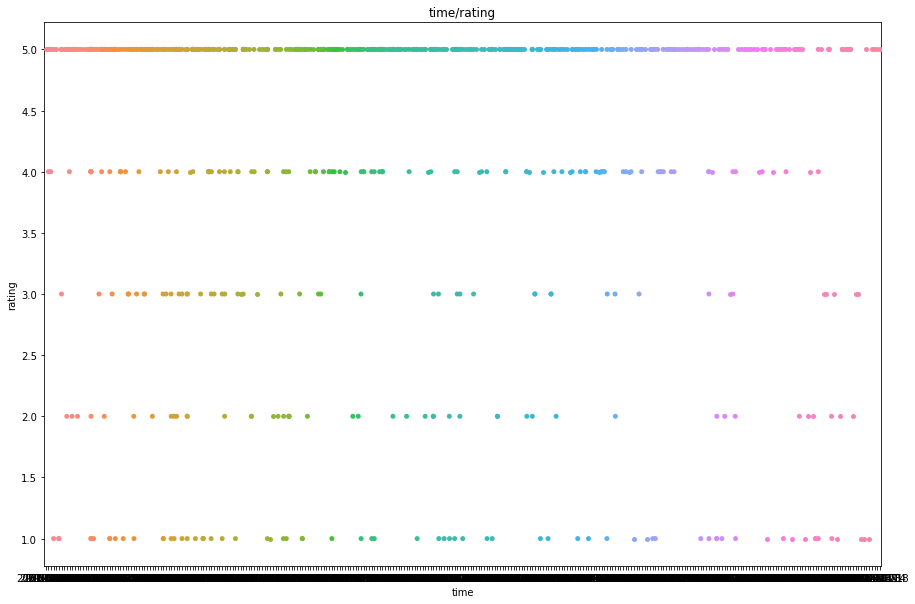

In [30]:
f, ax = plt.subplots(figsize=(15, 10))
plt.title('time/rating')
sns.stripplot(x='time', y='rating', data=time_rating, jitter=True, ax=ax)
plt.show()

### EDA Summary
There are 8 columns in the dataset and 742 observations in total.
- product_pattern: the product format 2 pack, 4 pack and 6 pack
- review_date: after 2017-01-01
- review_id: each review only have 1 id
- review rating: 5 - (473 counts), 4 - (104 counts), 1 - (70 counts), 3 - (49 counts), 2 - (48 counts) 
- review text: Simply check that the duplicates only occurred in short reviews
- review title: 257 customers used stars number to represent the title of the review
- user_id: there are not duplicates
- user_name: 80 customers use 'Amazon Customer' as their user name

product pattern/rating  
time/rating

# customers evaluation of topics  from reviews to predict the rating of each review

### Anticipated model:
- independent variable: rating of review (1-5)

- predictor:
    - topic 1: (weighted 1-5)
    - topic 2: (weighted 1-5)
    - topic 3: (weighted 1-5)
    - topic 4: (weighted 1-5)
    - topic 5: (weighted 1-5)
    
### ML algorithms might be used:
- random forest
- clustering
- svm
- nn

### Steps Plan:
- Extract customer's evaluation of different topics about the product from review text
        - popular 5 topics customer cared about
        - convert text evaluation into weighted scores
- Model fitting
- Predicting and test the difference between predicted rating and observed rating

### step1: customer's evaluation of different topics about the product from review text
#### 1.1: topics customer cared about

In [31]:
import numpy as np
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
import re
import spacy
nlp = spacy.load('en')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction import stop_words
from gensim.models import Word2Vec
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation

- collocation

In [32]:
text = df.sample(742, random_state=222, replace=False).loc[:, 'review_text'].apply(lambda t: bs4.BeautifulSoup(t, 'lxml').get_text())

In [33]:
%%time
token_text = []

for doc in nlp.pipe(text):
    for sent in doc.sents:
        token_text.append([t.lower_ for t in sent if not t.is_punct])

CPU times: user 8.41 s, sys: 2.02 s, total: 10.4 s
Wall time: 7.81 s


In [34]:
common_terms = list(stop_words.ENGLISH_STOP_WORDS) + ["'m", "'re", "'ll", "'s", "'ve", "'d", 'ca', 'is']
common_terms.remove('not')
common_terms.remove('nothing')
common_terms.remove('never')

In [35]:
WORDS_RE = re.compile(r'\W+')

In [36]:
phrases = Phrases(token_text, common_terms=common_terms)
colloc = Phraser(phrases)
colloc_text = colloc[token_text]
tri_phrases = Phrases(colloc_text, common_terms=common_terms)
tri_colloc = Phraser(tri_phrases)
tri_colloc_text = tri_colloc[colloc_text]

In [38]:
colloc_sent_li = []
for i in tri_colloc_text:
    if '_' in str(i):
        colloc_sent_li.append(i)


In [39]:
print(colloc_sent_li[0:10])

[['i', 'typically', 'do', 'not', 'write', 'reviews', 'but', 'i', 'was', 'impressed', 'when', 'i', 'put', 'in', 'a', 'aa_battery'], ['very', 'small', 'flashlight', 'but', 'super_bright'], ['i', 'did_not', 'notice', 'a', 'big', 'difference', 'in', 'brightness', 'between', 'the', 'spray', 'view', 'and', 'the', 'focused', 'view', 'but', 'there', 'could', 'be', 'a', 'difference', 'in', 'distance', 'just', 'guessing'], ['perfect', 'size', 'for', 'purse', 'or', 'glove_box'], ['great', 'little', 'flashlight', 'for', 'the', 'price', 'super_bright', 'and', 'sturdy'], ['bought', 'some', 'from', 'another', 'company', 'in', 'colors', 'and', 'a', 'few', 'had', 'problems', 'so', 'they', 'are', 'not', 'prefect', 'but', 'for', 'the', 'price', 'amazing', 'even', 'if', 'one', 'out', 'of', '10', 'does_not', 'work'], ['these', 'little', 'guys', 'are', 'rugged', 'durable', 'functional', 'and', 'easy_to_use', ' '], ['great_deal', 'for', 'a', 'pair', 'of', 'mini', 'flashlights', ' '], ['takes', 'just', 'one',

In [40]:
%%time

model = Word2Vec(tri_colloc_text, size=100, workers=8)

CPU times: user 1.41 s, sys: 29.7 ms, total: 1.44 s
Wall time: 1.42 s


In [41]:
vocab_set = set()

In [42]:
for sent in tri_colloc_text:
    vocab_set.update(sent)

In [43]:
vocab = pd.Series(list(model.wv.vocab))
vocab_vectors = []

for word in vocab:
    try:
        vec = model.wv[word]
        vocab_vectors.append(vec)
    except:
        pass

In [44]:
vector_array = np.concatenate(vocab_vectors, axis=0).reshape(-1, 100)
vec_array_l2 = normalize(vector_array, norm='l2')

In [45]:
km = KMeans(n_clusters=100, init='random', n_jobs=1, max_iter=1000)

In [46]:
%%time
km.fit(vec_array_l2)

CPU times: user 249 ms, sys: 11.8 ms, total: 261 ms
Wall time: 244 ms


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
words_to_lookup = ['battery', 'bright','good', 'nice','light']
series_filter = vocab.isin(words_to_lookup)
word_labels = km.labels_[series_filter]
words = vocab[series_filter]
words, word_labels

(3       bright
 8        light
 30        good
 160       nice
 213    battery
 dtype: object, array([95, 95, 95, 15, 95], dtype=int32))

In [48]:
for cluster_num, word in zip(word_labels, words):
    print('============{}============='.format(word))
    print(vocab[km.labels_ == cluster_num])

============bright=============
0                it
1                is
2                 a
3            bright
4           durable
5               and
6             cheap
7            little
8             light
9           perfect
10              for
12              the
13             like
14                 
15                i
16             even
17             used
19               an
20             when
21               to
22               on
23               my
26            still
28            these
29              are
30             good
31      flashlights
33              set
35            price
36             they
           ...     
382       different
384              us
389      adjustable
392          strong
396            dark
397            know
402             get
404           press
409            make
411         without
415               1
423        settings
426           being
431            life
432           worth
438              by
440            want
441    f

In [49]:
num_of_topics = 50

In [50]:
stops = list(stop_words.ENGLISH_STOP_WORDS) + ['what', 'just', 'like', 've', "'ve", "'m", "'s", "'ll", "ll",
                                               'really',
                                              ]

In [51]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(min_df=0.001, stop_words=stops)),
                     ('tsvd', TruncatedSVD(n_components=num_of_topics, n_iter=10)),
                     ('norm', Normalizer())
                    ])

In [52]:
new_data = pipeline.fit_transform(' '.join(sent) for sent in tri_colloc_text)

In [53]:
tfidf = pipeline.named_steps['tfidf']
tsvd = pipeline.named_steps['tsvd']

In [54]:
# repurposed from https://de.dariah.eu/tatom/topic_model_python.html#using-non-negative-matrix-factorization
def print_topic_words(components, vocab, num_topics=10, num_of_word_per_topic=10):
    topic_words = []
    vocab_array = np.array(vocab)

    for topic in components:
        word_idx = np.argsort(topic)[::-1][:num_of_word_per_topic]
        topic_words.append((vocab_array[word_idx]).tolist())
        
    for topic, words in list(zip(['Topic_{}'.format(i+1) for i in range(num_topics)], topic_words))[:10]:
        print(topic, words)

In [55]:
print_topic_words(tsvd.components_, tfidf.get_feature_names())

Topic_1 ['great', 'bright', 'light', 'flashlights', 'little', 'good', 'price', 'flashlight', 'small', 'work']
Topic_2 ['bright', 'light', 'small', 'nice', 'compact', 'size', 'good', 'strobe', 'love', 'battery']
Topic_3 ['good', 'price', 'quality', 'little', 'flashlights', 'flashlight', 'buy', 'works', 'work', 'battery']
Topic_4 ['flashlights', 'little', 'small', 'awesome', 'work', 'love', 'led', 'nice', 'handy', 'great_deal']
Topic_5 ['light', 'small', 'flashlight', 'little', 'lot', 'use', 'size', 'time', 'battery', 'weight']
Topic_6 ['flashlight', 'little', 'nice', 'best', 'lights', 'excellent', 'bright', 'money', 'super_bright', 'perfect']
Topic_7 ['work', 'flashlight', 'small', 'pocket', 'use', 'powerful', 'does_not', 'compact', 'super_bright', 'battery']
Topic_8 ['small', 'product', 'size', 'powerful', 'works', 'flashlights', 'great', 'pocket', 'compact', 'price']
Topic_9 ['price', 'product', 'flashlight', 'love', 'nice', 'excellent', 'worth', 'ca', 'flashlights', 't_beat']
Topic_1

In [56]:
lda_pipe = Pipeline([('tfidf', TfidfVectorizer(min_df=0.001, stop_words=stops)),
                     ('lda', LatentDirichletAllocation(n_components=num_of_topics)),
                    ])
lda_pipe.fit_transform(' '.join(sent) for sent in tri_colloc_text)
tfidf = lda_pipe.named_steps['tfidf']
lda = lda_pipe.named_steps['lda']

/Users/mani/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [57]:
print_topic_words(lda.components_, tfidf.get_feature_names())

Topic_1 ['item', 'fast', 'packaging', 'return', 'absolutely', 'shipping', 'metal', 'pinpoint', 'piece', 'quick']
Topic_2 ['love', 'feature', 'bright', 'used', 'lost', 'takes', 'think', 'did_n', 'zoom', 'need']
Topic_3 ['clip', 'carry', 'nt', 'convenient', 'belt', 'pocket', 'issue', 'months', 'wide', 'cheaply']
Topic_4 ['say', 'needed', 'glad', 'mighty', 'let', 'replace', 'reviews', 'hours', 'door', 'used']
Topic_5 ['light', 'small', 'way', 'super_bright', 'expected', 'fit', 'value', 'used', 'flashlight', 'lot']
Topic_6 ['better', 'arrived', 'hand', 'did', 'palm', 'fits', 'problem', 'similar', 'yeah', 'batteries']
Topic_7 ['buy', 'need', 'recommend', 'definitely', 'make', 'life', 'junk', 'couple', '10', 'long_time']
Topic_8 ['awesome', 'come', 'flashlights', 'soon', 'daily', 'buying', 'larger', 'look', 'carry', 'hand']
Topic_9 ['live', 'allows', 'sized', 'woods', 'searching', 'quickly', 'pinpoint', 'nice', 'arrived', 'power']
Topic_10 ['works', 'set', 'great', 'fine', 'stars', 'second',